# TensorFlow: Evaluating & Prediction

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

In [2]:
tf.__version__

'2.0.0'

In [3]:
tf.test.is_gpu_available()

True

# Build Model

In [4]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [5]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [6]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess

데이터셋 불러오기 

In [7]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [8]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

# Training

In [9]:
num_epochs = 1
batch_size = 64

In [10]:
hist = model.fit(train_x, train_y,
                batch_size = batch_size,
                shuffle = True)

Train on 60000 samples
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2182 - accuracy: 0.9294


In [11]:
hist.history

{'loss': [0.21820001251151164], 'accuracy': [0.92943335]}

# Evaluating  
- 학습한 모델 확인

In [12]:
model.evaluate(test_x, test_y,batch_size = batch_size)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.04158676280425862, 0.9864]

### 결과 확인

Input으로 들어갈 이미지 데이터 확인

In [13]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [14]:
test_image = test_x[0,:,:,0]
test_image.shape

(28, 28)

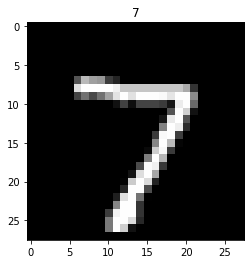

In [15]:
plt.title(test_y[0])
plt.imshow(test_image,'gray')
plt.show()

- 모델에 Input Data로 확인 할 이미지 데이터 넣기

In [16]:
pred = model.predict(test_image.reshape(1,28,28,1))
pred.shape

(1, 10)

In [17]:
pred

array([[2.4832456e-08, 4.5303552e-09, 3.2230980e-06, 2.2876013e-06,
        1.7436451e-09, 2.2332252e-09, 3.0855427e-12, 9.9999416e-01,
        2.1672273e-08, 3.6658983e-07]], dtype=float32)

- np.argmax

In [19]:
np.argmax(pred)

7

## Test Batch

Batch로 Test Dataset 넣기

In [35]:
test_batch = test_x[:100]
test_batch.shape

(100, 28, 28, 1)

Batch Test Dataset 모델에 넣기

In [36]:
preds = model.predict(test_batch)
preds.shape

(100, 10)

- 결과 확인

In [37]:
np.argmax(preds, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

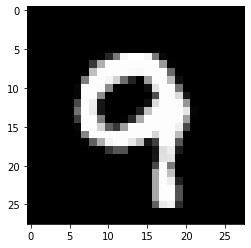

In [39]:
plt.imshow(test_batch[99,:,:,0],'gray')
plt.show